# Linear Regression Assignment

Reading and Understanding Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

#Reading Car price dataset in dataframe
carprice = pd.read_csv("CarPrice_Assignment.csv")

pd.set_option('display.max_columns', None)

carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
#Checking for Null values
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Cleanup

In [3]:
#Extracting Company Name from CarName
carprice["CarName"] = carprice.apply(lambda x: x["CarName"].split(" ")[0], axis=1)

In [4]:
#Converting DF to Lowercase only for Str type
carprice = carprice.applymap(lambda x: x.lower() if type(x) == str else x)

#Dropping Car ID as it will not be useful for analysis
carprice = carprice.drop('car_ID',axis=1)

carprice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#Checking the Unique Car Company Names
carprice["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
#Checking count of unique values for each column
carprice.nunique().sort_values(ascending=False)

price               189
curbweight          171
carlength            75
horsepower           59
wheelbase            53
carheight            49
enginesize           44
carwidth             44
boreratio            38
stroke               37
compressionratio     32
highwaympg           30
citympg              29
CarName              27
peakrpm              23
fuelsystem            8
enginetype            7
cylindernumber        7
symboling             6
carbody               5
drivewheel            3
enginelocation        2
doornumber            2
aspiration            2
fueltype              2
dtype: int64

In [7]:
#Correcting Car Company Names
carprice['CarName'].replace({'alfa-romero':'alfa-romeo', 'maxda':'mazda', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'}, inplace=True)

In [8]:
#Checking the Car Cyclinder unique values
carprice["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [9]:
#Correcting Cylinder numbder from string to Numeric
carprice["cylindernumber"] = carprice["cylindernumber"].map({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12})

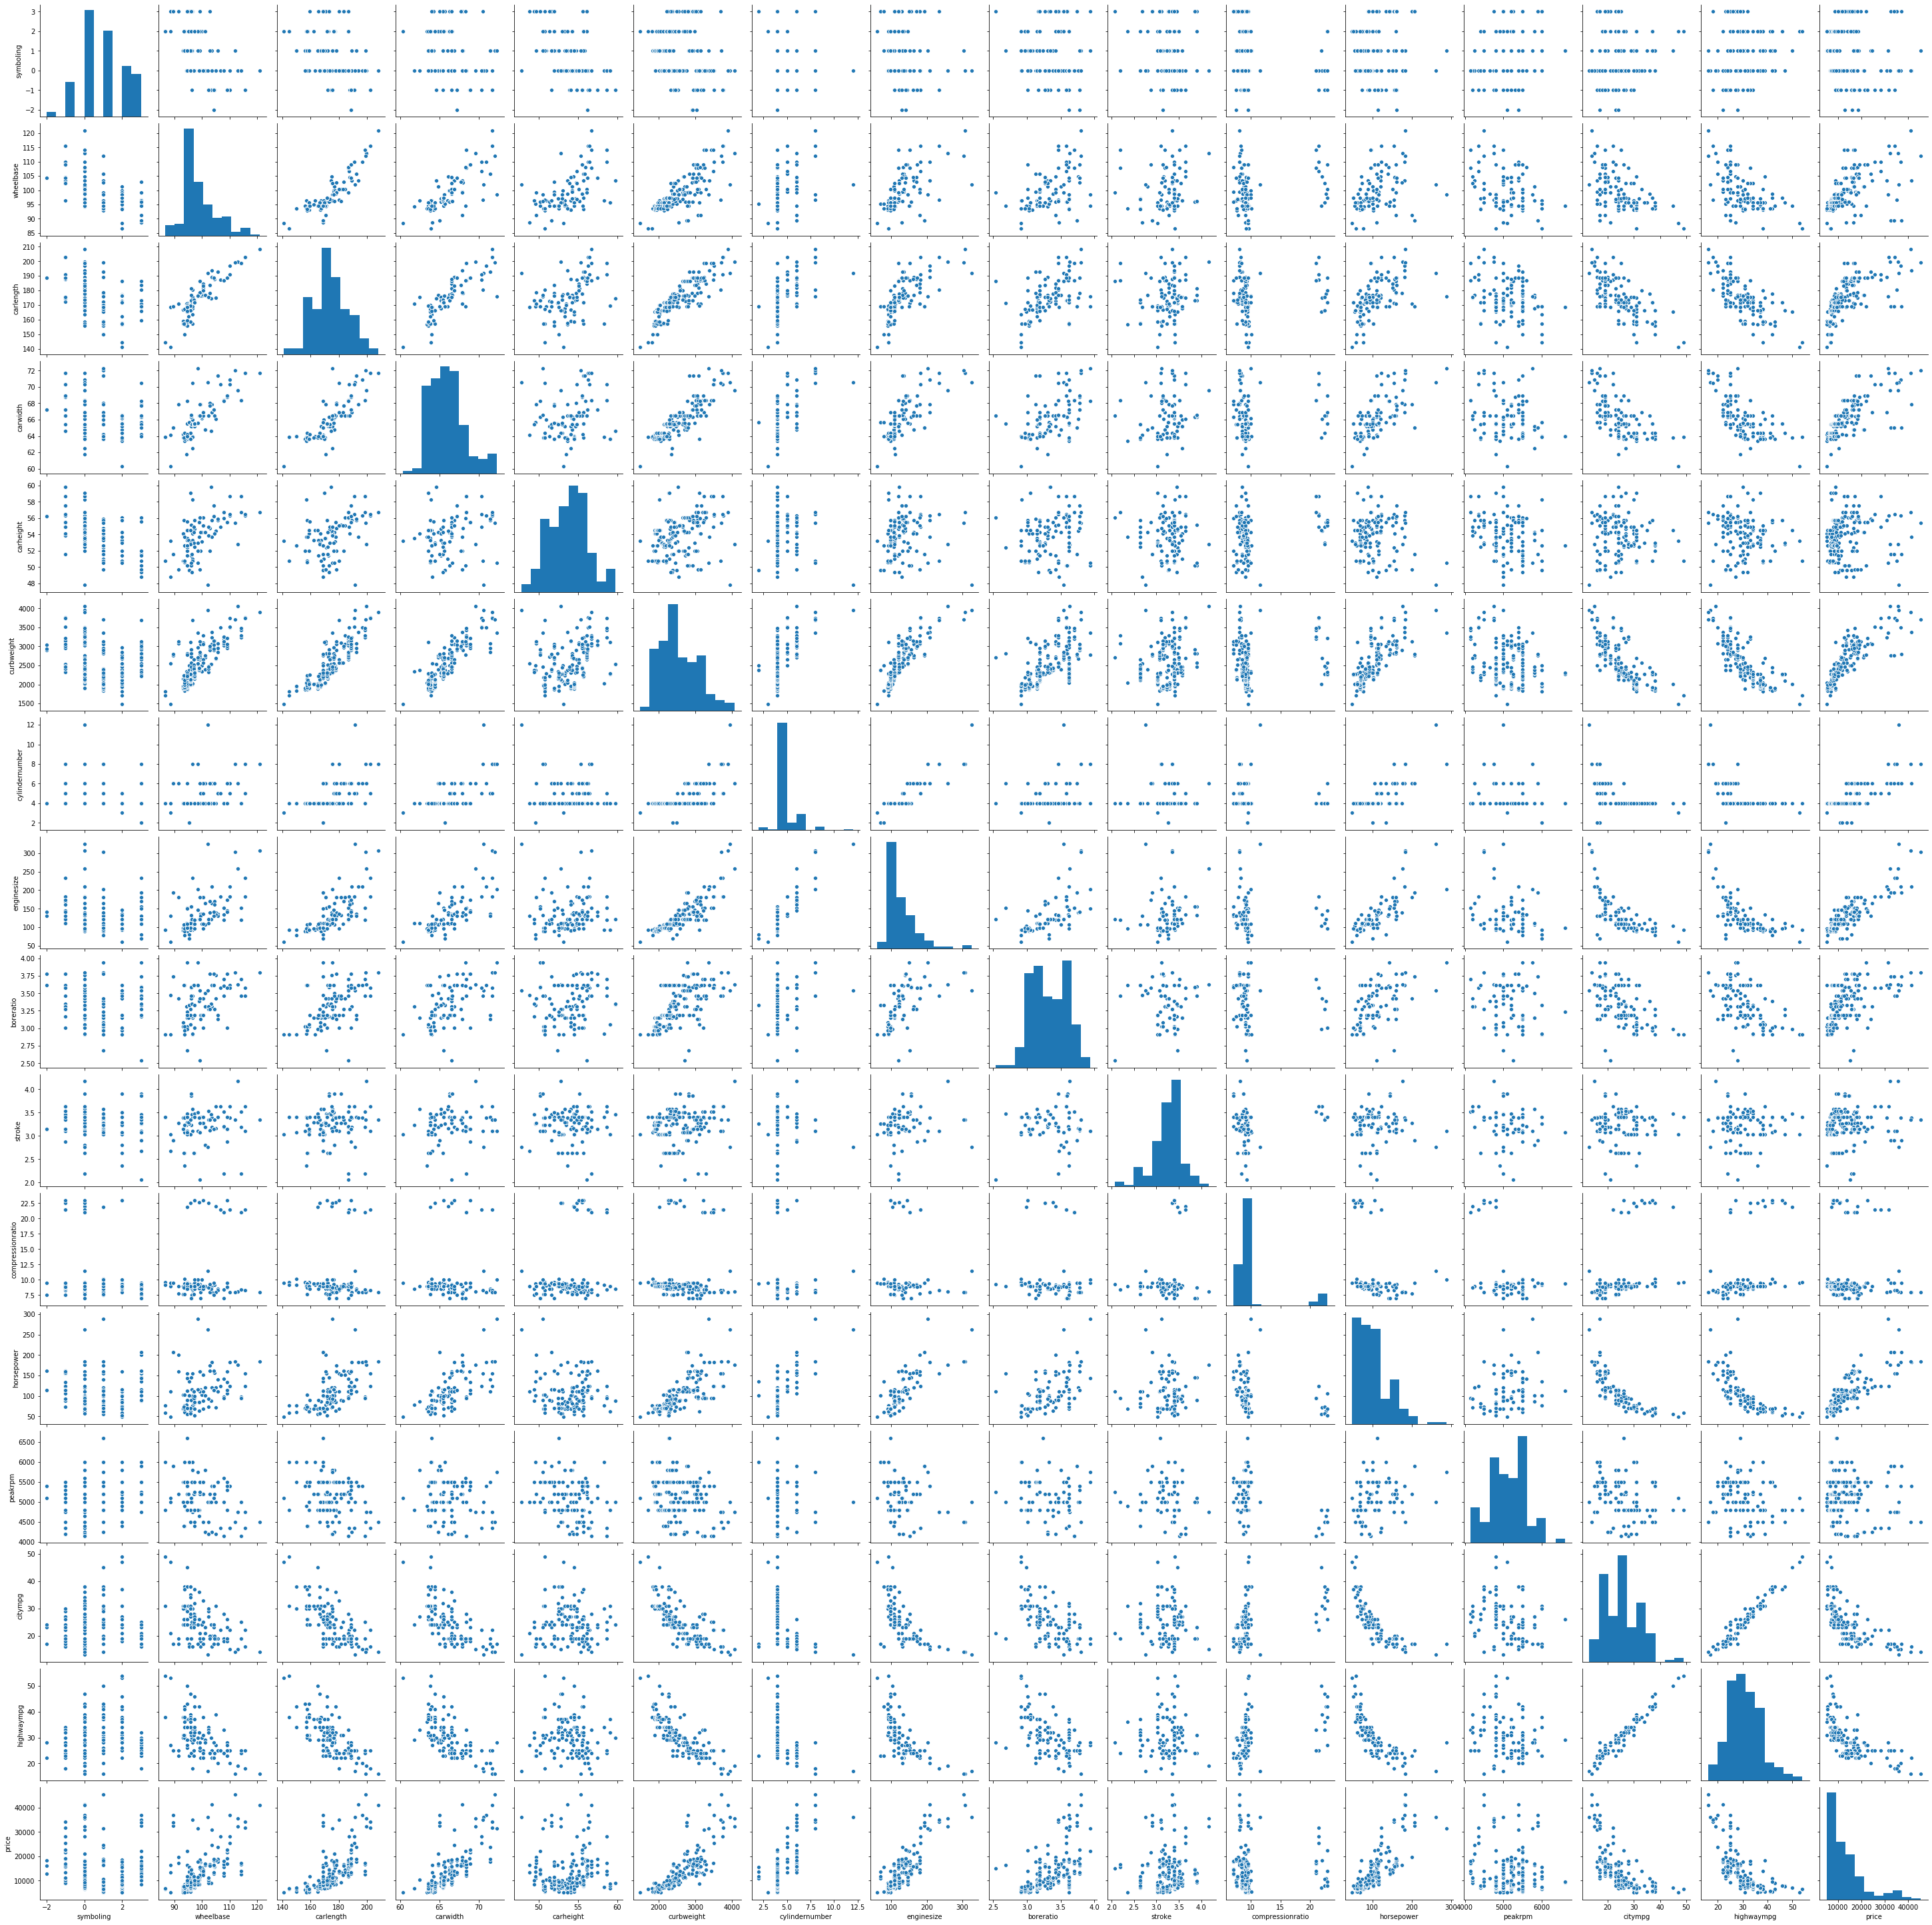

In [10]:
#Pair plot of all the Numeric Values
sns.pairplot(carprice)
plt.show()

From Above we could see that Price has Linear correlation with quite a few variables like engine size, curbweight

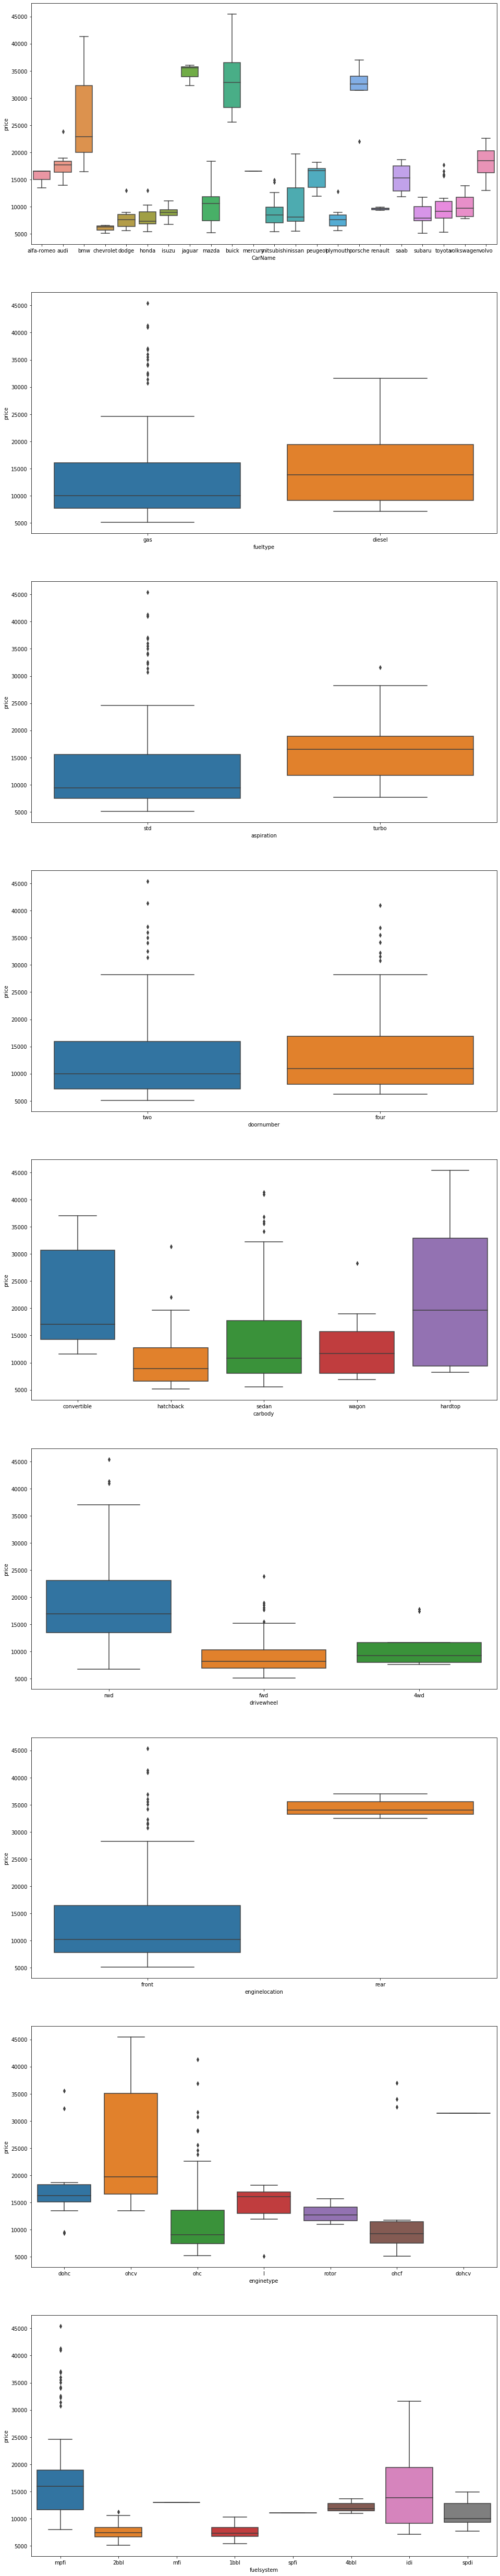

In [11]:
plt.figure(figsize=(16, 90))
plt.subplot(9,1,1)
sns.boxplot(x="CarName", y="price", data=carprice)
plt.subplot(9,1,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(9,1,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(9,1,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(9,1,5)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(9,1,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(9,1,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(9,1,8)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(9,1,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.show()

From Abve Box plots we can see we can compare the Categorical values and also see if some of them correlate higher with price

In [66]:
#Converting Category variables with two values to o and 1
carprice['fueltype'] = carprice['fueltype'].map({'gas': 0, 'diesel': 1})
carprice['aspiration'] = carprice['aspiration'].map({'turbo':1, 'std':0})
carprice['doornumber'] = carprice['doornumber'].map({'two':0, 'four':1})
carprice['enginelocation'] = carprice['enginelocation'].map({'front':0, 'rear':1})

In [13]:
#Deriving segments for CarName based on country/continent of origin

carprice['carorigin'] = carprice['CarName'].map({'alfa-romeo': "European", 'audi': "European", 'bmw': "European", 'jaguar': "European", 'peugeot': "European", 'porsche': "European", 'renault': "European", 'saab': "European", 'volkswagen': "European", 'volvo': "European", 'chevrolet': "American", 'dodge': "American", 'buick': "American", 'mercury': "American", 'plymouth': "American", 'honda': "Asian", 'isuzu': "Asian", 'mazda': "Asian", 'mitsubishi': "Asian", 'nissan': "Asian", 'subaru': "Asian", 'toyota': "Asian"})
carprice_lr = carprice.drop('CarName', axis=1)

In [14]:
carprice_lr.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carorigin
0,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,European
1,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,European
2,1,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,European
3,2,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,European
4,2,0,0,1,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,European


In [15]:
#Creating a function to get dummy variables for categorical values with n-1 format
def dummy(x,df):
    new = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, new], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

carprice_lr = dummy('carorigin',carprice_lr)
carprice_lr = dummy('carbody',carprice_lr)
carprice_lr = dummy('drivewheel',carprice_lr)
carprice_lr = dummy('enginetype',carprice_lr)
carprice_lr = dummy('fuelsystem',carprice_lr)


In [16]:
carprice_lr.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Asian,European,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# Splitting Test and Training Set

In [17]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(carprice_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling features using MinMax (Normalization)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import warnings
warnings.filterwarnings('ignore')

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_var = ['symboling' , 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_train[num_var] = scaler.fit_transform(df_train[num_var])

df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Asian,European,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.6,0,0,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
125,1.0,0,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
166,0.6,0,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,0,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
199,0.2,0,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


Dividing into X and Y sets for the model building

In [19]:
#Splitting Price into Y Train
y_train = df_train.pop('price')
X_train = df_train

In [20]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [21]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [22]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 21),
 ('fueltype', False, 5),
 ('aspiration', False, 23),
 ('doornumber', False, 29),
 ('enginelocation', True, 1),
 ('wheelbase', False, 20),
 ('carlength', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 12),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 3),
 ('horsepower', True, 1),
 ('peakrpm', False, 6),
 ('citympg', False, 17),
 ('highwaympg', False, 7),
 ('Asian', False, 19),
 ('European', False, 26),
 ('hardtop', False, 10),
 ('hatchback', False, 8),
 ('sedan', False, 11),
 ('wagon', False, 9),
 ('fwd', False, 27),
 ('rwd', False, 14),
 ('dohcv', True, 1),
 ('l', False, 18),
 ('ohc', False, 4),
 ('ohcf', False, 13),
 ('ohcv', False, 15),
 ('rotor', True, 1),
 ('2bbl', False, 28),
 ('4bbl', False, 25),
 ('idi', False, 2),
 ('mfi', False, 30),
 ('mpfi', False, 24),
 ('spdi', False, 22),
 ('spfi', False, 31)]

In [23]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'dohcv', 'rotor'],
      dtype='object')

In [24]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'peakrpm', 'citympg',
       'highwaympg', 'Asian', 'European', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

## Building model using statsmodel for further Analysis

In [25]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [26]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [27]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [28]:
#summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     87.53
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.96e-53
Time:                        23:16:54   Log-Likelihood:                 162.26
No. Observations:                 143   AIC:                            -302.5
Df Residuals:                     132   BIC:                            -269.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1511      0.092      1.

horsepower is insignificant and so we will remove it

In [29]:
X_train_new = X_train_rfe.drop(["horsepower"], axis = 1)

Rebuilding the model without horsepower

In [31]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

In [32]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     96.69
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.23e-54
Time:                        23:16:54   Log-Likelihood:                 161.43
No. Observations:                 143   AIC:                            -302.9
Df Residuals:                     133   BIC:                            -273.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1409      0.092      1.

In [33]:
X_train_new.columns

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'dohcv', 'rotor'],
      dtype='object')

In [34]:
#Dropped constant as its hight P value
X_train_new = X_train_new.drop(['const'], axis=1)

In [35]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,42.19
1,carwidth,36.74
4,enginesize,30.59
3,cylindernumber,17.46
5,boreratio,9.65
6,stroke,7.33
8,rotor,1.25
7,dohcv,1.15
0,enginelocation,1.12


In [36]:
#Dropping curb wight due to high collinearity
X_train_new = X_train_new.drop(['curbweight'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,carwidth,22.37
3,enginesize,17.18
2,cylindernumber,16.19
4,boreratio,9.46
5,stroke,7.27
7,rotor,1.22
6,dohcv,1.12
0,enginelocation,1.11


In [37]:
#Running linear model and checking summary
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              227.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                    2.25e-74
Time:                        23:16:54   Log-Likelihood:                          156.91
No. Observations:                 143   AIC:                                     -297.8
Df Residuals:                     135   BIC:                                     -274.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [38]:
#Dropping DOHCV as P values is higher
X_train_new = X_train_new.drop(['dohcv'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,22.08
3,enginesize,16.82
2,cylindernumber,15.61
4,boreratio,9.45
5,stroke,6.78
6,rotor,1.22
0,enginelocation,1.11


In [39]:
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              256.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                    4.96e-75
Time:                        23:16:54   Log-Likelihood:                          155.54
No. Observations:                 143   AIC:                                     -297.1
Df Residuals:                     136   BIC:                                     -276.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [41]:
#Dropping carwidth as VIF is very high
X_train_new = X_train_new.drop(['carwidth'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,15.25
1,cylindernumber,14.93
3,boreratio,6.70
4,stroke,5.65
5,rotor,1.16
0,enginelocation,1.05


In [42]:
#Modelling and checking summary
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              216.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                    2.41e-67
Time:                        23:16:54   Log-Likelihood:                          133.98
No. Observations:                 143   AIC:                                     -256.0
Df Residuals:                     137   BIC:                                     -238.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [43]:
#Dropping bore ratio due to high P value
X_train_new = X_train_new.drop(['boreratio'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,cylindernumber,14.86
2,enginesize,12.45
3,stroke,4.58
4,rotor,1.12
0,enginelocation,1.04


In [44]:
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              259.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                    2.59e-68
Time:                        23:16:54   Log-Likelihood:                          133.35
No. Observations:                 143   AIC:                                     -256.7
Df Residuals:                     138   BIC:                                     -241.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [45]:
#Dropped Cylinder number due to High VIF
X_train_new = X_train_new.drop(['cylindernumber'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,3.79
1,enginesize,3.76
3,rotor,1.07
0,enginelocation,1.04


In [46]:
X_train_new.columns

Index(['enginelocation', 'enginesize', 'stroke', 'rotor'], dtype='object')

In [47]:
#Modelling and checking summary
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.897
Method:                 Least Squares   F-statistic:                              314.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                    1.57e-68
Time:                        23:16:54   Log-Likelihood:                          130.82
No. Observations:                 143   AIC:                                     -253.6
Df Residuals:                     139   BIC:                                     -241.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

# Residual Analysis of the train data¶
Checking if the error terms are also normally distributed.

In [48]:
y_train_price = lm.predict(X_train_new)


In [49]:

r2=r2_score(y_train, y_train_price)
print('Test Model r2_score:',r2)

Test Model r2_score: 0.7966050447984232


Text(0.5, 0, 'Errors')

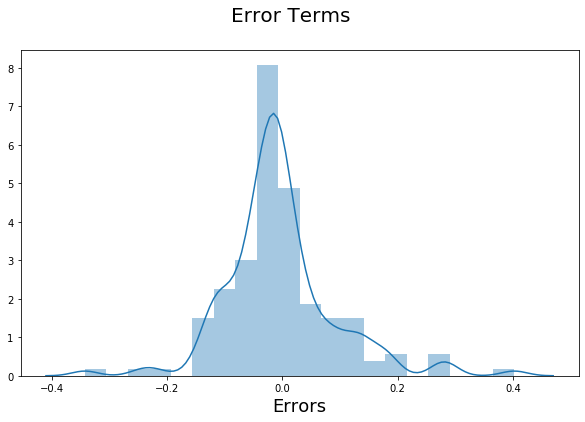

In [50]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(10, 6))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms almost follows a Normal curve with 0.0 at the median.

# Predictions

In [51]:
num_var = ['symboling' , 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_var] = scaler.transform(df_test[num_var])

In [52]:
y_test = df_test.pop('price')
X_test = df_test

In [61]:
#using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]



In [62]:
X_test_new.head()

,enginelocation,enginesize,stroke,rotor
160,0,0.139623,0.424242,0
186,0,0.181132,0.611111,0
59,0,0.230189,0.606061,0
165,0,0.139623,0.449495,0
140,0,0.177358,0.227273,0


In [63]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

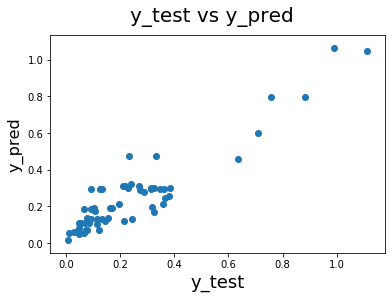

In [64]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [65]:
r2=r2_score(y_test, y_pred)
print('Test Model r2_score:',r2)

Test Model r2_score: 0.8567949072913523


Price = 0.2322 * engine location + 1.2412 * engine size - 0.1574 * stroke + 0.2491 * rotor

Adjusted R2 on Training set is around 80%
Adjusted R2 on Test Set is around 85%